# Bike Sharing Geospatial Data Analysis During COVID-19
## By Yarong Chen

Using Data from 2020 to  2022

**Questions to be answered:**


## 0. Import Packages

In [5]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import arcpy
# show plots after Notebook cells
%matplotlib inline


In [6]:
import arcpy
arcpy.env.overwriteOutput = True
workGDB = arcpy.env.workspace
workGDB

'C:/Users/yc73905/Downloads/Bike_Sharing_Pjt/output.gdb/gdp_7_shp'

## 1. Import Data

In [3]:
df = pd.read_csv("C:/Users/yc73905/Downloads/Bike_Sharing_Pjt/gdf_start_7_.csv")
print(df.shape)
df.head()

sys:1: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.


(17271164, 22)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,year,dayofweek,dayofmonth,duration_minutes,h3_index,lat,lng,geometry
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,41.894434,-87.623379,casual,11,2020,6,1,9.666667,872664c1effffff,41.895400,-87.626394,POINT (-87.6263938841017 41.8941765)
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,41.900675,-87.662480,casual,11,2020,6,1,11.316667,872664cadffffff,41.891024,-87.655950,POINT (-87.65595033896504 41.89095866666667)
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,41.872054,-87.629550,casual,11,2020,6,1,29.016667,872664c1affffff,41.874988,-87.635029,POINT (-87.63502864308958 41.88098283333333)
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,41.917744,-87.691392,casual,11,2020,6,1,9.250000,872664ca1ffffff,41.923092,-87.697834,POINT (-87.69783408505538 41.89549916666667)
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,41.876448,-87.620338,casual,11,2020,6,1,33.450000,872664c1affffff,41.874988,-87.635029,POINT (-87.63502864308958 41.87649733333333)


In [4]:
df['start_date'] = pd.to_datetime(df['started_at']).dt.strftime("%Y-%m-%d")
df['started_at'] = pd.to_datetime(df['started_at'])
df['start_date'] = pd.to_datetime(df['start_date'])
df1 = df.copy()
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,year,dayofweek,dayofmonth,duration_minutes,h3_index,lat,lng,geometry,start_date
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,41.894434,-87.623379,casual,11,2020,6,1,9.666667,872664c1effffff,41.895400,-87.626394,POINT (-87.6263938841017 41.8941765),2020-11-01
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,41.900675,-87.662480,casual,11,2020,6,1,11.316667,872664cadffffff,41.891024,-87.655950,POINT (-87.65595033896504 41.89095866666667),2020-11-01
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,41.872054,-87.629550,casual,11,2020,6,1,29.016667,872664c1affffff,41.874988,-87.635029,POINT (-87.63502864308958 41.88098283333333),2020-11-01
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,41.917744,-87.691392,casual,11,2020,6,1,9.250000,872664ca1ffffff,41.923092,-87.697834,POINT (-87.69783408505538 41.89549916666667),2020-11-01
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,41.876448,-87.620338,casual,11,2020,6,1,33.450000,872664c1affffff,41.874988,-87.635029,POINT (-87.63502864308958 41.87649733333333),2020-11-01


In [5]:
df1 = df.copy()

In [6]:
df.h3_index.nunique()

125

In [7]:
# count points by each day for 2020, 2021, 2022
# dt_20_21_22 = df.groupby(['start_date', 'h3_index', 'rideable_type', 'member_casual'])[['h3_index']].count()
df_daily_volume = df.groupby(['start_date','h3_index'])[['h3_index']].count()
df_daily_volume = df_daily_volume.sort_values('start_date')
df_daily_volume = df_daily_volume.rename(columns={"h3_index": "daily_count"})
df_daily_volume = df_daily_volume.reset_index()
df_daily_volume

,start_date,h3_index,daily_count
0,2020-01-01,872664c10ffffff,340
1,2020-01-01,872664cd5ffffff,2
2,2020-01-01,872664ce2ffffff,8
3,2020-01-01,872664ce3ffffff,12
4,2020-01-01,872664ceaffffff,8
...,...,...,...
56937,2022-04-30,872664ca2ffffff,2
56938,2022-04-30,872664ca1ffffff,272
56939,2022-04-30,872664ca0ffffff,38
56940,2022-04-30,872664c8cffffff,6


In [8]:
# pivot table based on indivieual hex index
daily_volume = df_daily_volume.pivot(index='h3_index', columns='start_date', values='daily_count').fillna(0)
daily_volume

start_date,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,2020-01-11,2020-01-12,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,...,2022-03-22,2022-03-23,2022-03-24,2022-03-25,2022-03-26,2022-03-27,2022-03-28,2022-03-29,2022-03-30,2022-03-31,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08,2022-04-09,2022-04-10,2022-04-11,2022-04-12,2022-04-13,2022-04-14,2022-04-15,2022-04-16,2022-04-17,2022-04-18,2022-04-19,2022-04-20,2022-04-21,2022-04-22,2022-04-23,2022-04-24,2022-04-25,2022-04-26,2022-04-27,2022-04-28,2022-04-29,2022-04-30
h3_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
872664191ffffff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
872664193ffffff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
872664194ffffff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,2.0,4.0,2.0,4.0,6.0,2.0,0.0,0.0,20.0,2.0,12.0,0.0,0.0,0.0,4.0,6.0,0.0,0.0,0.0,6.0,0.0,8.0,0.0,2.0,2.0,0.0,0.0,4.0,0.0
872664195ffffff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
872664196ffffff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872664da3ffffff,2.0,14.0,20.0,6.0,4.0,32.0,32.0,34.0,30.0,18.0,4.0,2.0,18.0,38.0,20.0,32.0,22.0,4.0,0.0,8.0,30.0,26.0,14.0,22.0,8.0,8.0,32.0,30.0,28.0,30.0,26.0,6.0,4.0,28.0,24.0,20.0,8.0,26.0,6.0,0.0,...,6.0,14.0,8.0,36.0,4.0,18.0,24.0,50.0,32.0,48.0,50.0,16.0,24.0,38.0,52.0,46.0,50.0,22.0,22.0,40.0,88.0,32.0,44.0,56.0,26.0,52.0,28.0,40.0,42.0,36.0,70.0,42.0,128.0,44.0,82.0,42.0,30.0,46.0,40.0,18.0
872664daaffffff,6.0,8.0,14.0,6.0,2.0,10.0,8.0,2.0,8.0,8.0,2.0,4.0,8.0,8.0,12.0,4.0,2.0,4.0,4.0,2.0,18.0,14.0,4.0,10.0,4.0,8.0,4.0,6.0,10.0,16.0,8.0,20.0,4.0,8.0,8.0,0.0,4.0,10.0,10.0,6.0,...,6.0,2.0,0.0,8.0,2.0,4.0,2.0,2.0,2.0,6.0,6.0,2.0,6.0,6.0,2.0,8.0,6.0,4.0,8.0,12.0,16.0,14.0,10.0,6.0,4.0,2.0,2.0,16.0,6.0,6.0,20.0,4.0,38.0,16.0,4.0,0.0,4.0,6.0,4.0,6.0
872664db1ffffff,0.0,8.0,6.0,0.0,0.0,10.0,4.0,4.0,12.0,2.0,0.0,0.0,4.0,6.0,4.0,2.0,2.0,0.0,0.0,2.0,10.0,4.0,8.0,2.0,0.0,2.0,2.0,0.0,2.0,6.0,2.0,2.0,0.0,4.0,6.0,2.0,6.0,6.0,2.0,0.0,...,2.0,0.0,0.0,2.0,2.0,0.0,0.0,4.0,0.0,0.0,

In [9]:
# review the time spand
lastDate = daily_volume.columns[-1]
date = pd.to_datetime(lastDate).strftime('%Y-%m-%d')
print(f"The data starts from 2020-01-01 and up to {date}")
lastDate

The data starts from 2020-01-01 and up to 2022-04-30


Timestamp('2022-04-30 00:00:00')

In [10]:
daily_volume.sort_values(by = lastDate).tail(10)

start_date,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,2020-01-11,2020-01-12,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,...,2022-03-22,2022-03-23,2022-03-24,2022-03-25,2022-03-26,2022-03-27,2022-03-28,2022-03-29,2022-03-30,2022-03-31,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08,2022-04-09,2022-04-10,2022-04-11,2022-04-12,2022-04-13,2022-04-14,2022-04-15,2022-04-16,2022-04-17,2022-04-18,2022-04-19,2022-04-20,2022-04-21,2022-04-22,2022-04-23,2022-04-24,2022-04-25,2022-04-26,2022-04-27,2022-04-28,2022-04-29,2022-04-30
h3_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
872664d89ffffff,110.0,184.0,156.0,142.0,120.0,216.0,152.0,136.0,160.0,106.0,28.0,58.0,166.0,196.0,188.0,156.0,94.0,50.0,30.0,84.0,106.0,116.0,64.0,72.0,70.0,94.0,142.0,140.0,134.0,168.0,140.0,148.0,300.0,158.0,120.0,94.0,74.0,102.0,152.0,64.0,...,238.0,176.0,234.0,294.0,156.0,224.0,210.0,228.0,128.0,210.0,280.0,182.0,316.0,284.0,276.0,354.0,280.0,190.0,438.0,712.0,500.0,600.0,288.0,340.0,288.0,444.0,332.0,232.0,380.0,268.0,792.0,210.0,1922.0,574.0,362.0,364.0,248.0,336.0,496.0,392.0
872664c1bffffff,178.0,322.0,296.0,148.0,160.0,346.0,332.0,246.0,260.0,230.0,18.0,60.0,262.0,350.0,360.0,270.0,120.0,52.0,48.0,156.0,222.0,214.0,160.0,118.0,118.0,120.0,282.0,250.0,262.0,330.0,254.0,150.0,442.0,350.0,290.0,224.0,134.0,216.0,224.0,76.0,...,236.0,278.0,208.0,316.0,208.0,266.0,196.0,246.0,118.0,184.0,456.0,262.0,444.0,386.0,350.0,424.0,228.0,190.0,410.0,810.0,604.0,668.0,270.0,358.0,560.0,972.0,336.0,194.0,434.0,298.0,998.0,260.0,2166.0,602.0,410.0,386.0,324.0,328.0,672.0,500.0
872664cacffffff,230.0,600.0,544.0,404.0,368.0,614.0,624.0,510.0,654.0,488.0,120.0,172.0,538.0,636.0,548.0,458.0,278.0,140.0,116.0,304.0,448.0,488.0,310.0,252.0,242.0,282.0,562.0,634.0,500.0,580.0,510.0,374.0,590.0,558.0,482.0,384.0,262.0,460.0,392.0,200.0,...,570.0,452.0,390.0,582.0,392.0,450.0,392.0,506.0,250.0,424.0,650.0,422.0,660.0,602.0,790.0,738.0,590.0,344.0,736.0,1124.0,786.0,1034.0,414.0,660.0,556.0,820.0,344.0,418.0,718.0,550.0,1230.0,566.0,2654.0,934.0,728.0,698.0,614.0,684.0,1024.0,700.0
872664c12ffffff,136.0,374.0,324.0,262.0,250.0,390.0,420.0,284.0,352.0,292.0,76.0,122.0,328.0,356.0,372.0,284.0,156.0,74.0,60.0,192.0,264.0,282.0,202.0,170.0,102.0,190.0,314.0,344.0,352.0,324.0,298.0,242.0,424.0,422.0,298.0,272.0,180.0,258.0,232.0,122.0,...,460.0,314.0,428.0,548.0,390.0,342.0,442.0,528.0,258.0,396.0,544.0,386.0,540.0,586.0,642.0,708.0,550.0,374.0,668.0,886.0,788.0,1022.0,486.0,672.0,526.0,626.0,364.0,426.0,682.0,536.0,1272.0,508.0,2136.0,834.0,712.0,828.0,668.0,756.0,1002.0,766.0
872664cadffffff,294.0,1052.0,980.0,452.0,448.0,1132.0,1278.0,896.0,1188.0,990.0,124.0,280.0,1100.0,1184.0,1188.0,892.0,666.0,178.0,134.0,524.0,926.0,944.0,608.0,630.0,206.0,402.0,1174.0,1268.0,1138.0,1144.0,896.0,516.0,710.0,1240.0,1108.0,1086.0,558.0,948.0,494.0,276.0,...,980.0,856.0,866.0,1002.0,594.0,550.0,790.0,1068.0,690.0,776.0,1240.0,514.0,878.0,1184.0,1500.0,1332.0,1090.0,672.0,958.0,1474.0,1328.0,2048.0,982.0,1380.0,1056.0,1100.0,650.0,870.0,1402.0,1230.0,2218.0,868.0,2998.0,1064.0,1468.0,1576.0,1430.0,1458.0,1622.0,970.0
872664c16ffffff,288.0,756.0,552.0,540.0,430.0,668.0,690.0,464.0,662.0,450.0,152.0,248.0,558.0,586.0,548.0,408.0,298.0,136.0,122.0,304.0,410.0,428.0,312.0,284.0,250.0,340.0,574.0,578.0,530.0,550.0,488.0,484.0,766.0,562.0,494.0,392.0,262.0,462.0,484.0,212.0,...,600.0,616.0,604.0,850.0,690.0,582.0,586.0,706.0,454.0,606.0,1004.0,692.0,890.0,1016.0,904.0,982.0,976.0,588.0,1386.0,2102.0,1252.0,1604.0,672.0,974.0,970.0,1216.0,768.0,718.0,1210.0,906.0,2346.0,868.0,4842.0,1450.0,1050.0,1136.0

In [11]:
# count points by each day for 2020, 2021, 2022
# dt_20_21_22 = df.groupby(['start_date', 'h3_index', 'rideable_type', 'member_casual'])[['h3_index']].count()
dt_20_21_22 = df.groupby(['start_date','h3_index', 'rideable_type'])[['h3_index']].count()
dt_20_21_22 = dt_20_21_22.sort_values('start_date')
dt_20_21_22 = dt_20_21_22.rename(columns={"h3_index": "daily_ride_type_count"})
dt_20_21_22 = dt_20_21_22.reset_index()
dt_20_21_22

,start_date,h3_index,rideable_type,daily_ride_type_count
0,2020-01-01,872664c10ffffff,docked_bike,340
1,2020-01-01,872664cd5ffffff,docked_bike,2
2,2020-01-01,872664ce2ffffff,docked_bike,8
3,2020-01-01,872664ce3ffffff,docked_bike,12
4,2020-01-01,872664ceaffffff,docked_bike,8
...,...,...,...,...
105424,2022-04-30,872664ca5ffffff,classic_bike,66
105425,2022-04-30,872664ca5ffffff,docked_bike,12
105426,2022-04-30,872664ca5ffffff,electric_bike,54
105427,2022-04-30,872664ca6ffffff,electric_bike,4


## 2. Exploratory Data Analysis


### 2.1 Daily time series data by ride types - findings:
* It shows strong seasonality: more in summer, less in winter
* Electric bike is new riding type since July of 2020. It shows more flat seasonality compared with traditional bike. (green below is traditional bike, orange is electric bike)
* Bike sharing in winter is much higher before COVID hits, which remains low in the past two years.

In [12]:
dt_20_21_22['rideable_type'].unique()

array(['docked_bike', 'electric_bike', 'classic_bike'], dtype=object)

In [13]:
df_daily_dock = dt_20_21_22[dt_20_21_22['rideable_type']=='docked_bike']
df_daily_electric = dt_20_21_22[dt_20_21_22['rideable_type']=='electric_bike']
df_daily_classic = dt_20_21_22[dt_20_21_22['rideable_type']=='classic_bike']

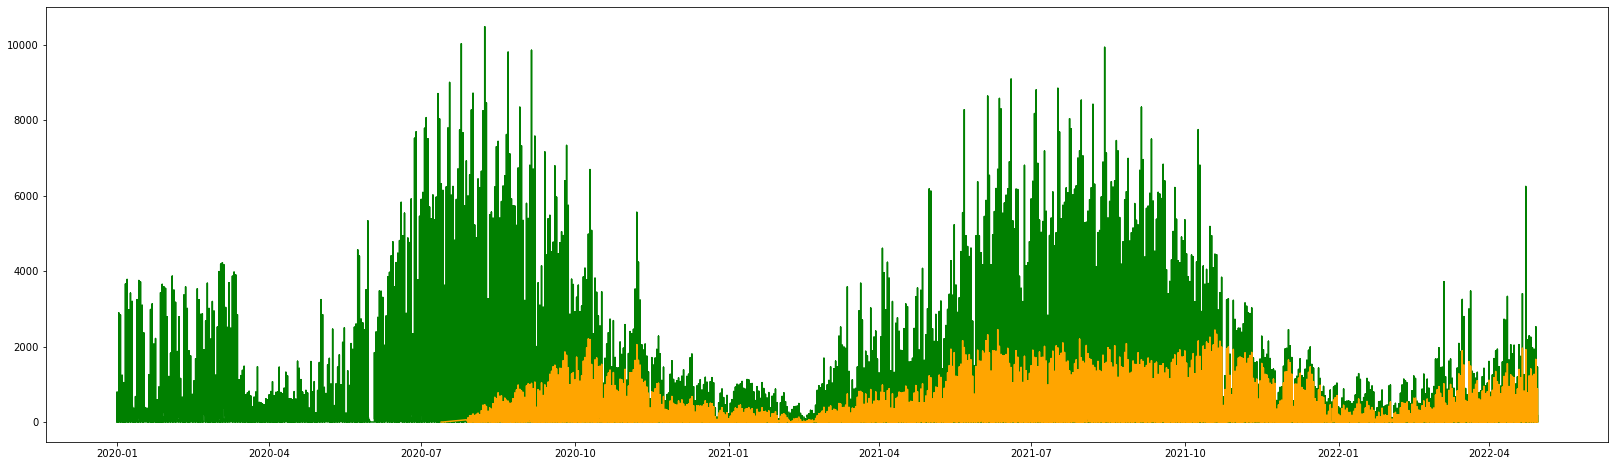

In [14]:
plt.figure(figsize=[28,8])
plt.plot(df_daily_dock["start_date"],df_daily_dock["daily_ride_type_count"], color='green')
plt.plot(df_daily_classic["start_date"],df_daily_classic["daily_ride_type_count"], color='green') # it shows dock type replaced by classic, means they can be parked anywhere. so I put the same color
plt.plot(df_daily_electric["start_date"],df_daily_electric["daily_ride_type_count"], color='orange') # electrics shows overall increase since the summer of 2020
plt.show()

In [15]:
# count points by each day for 2020, 2021, 2022 for member_casual
dt_20_21_22 = df.groupby(['start_date','h3_index', 'lat', 'lng','geometry','member_casual'])[['h3_index']].count()
dt_20_21_22 = dt_20_21_22.sort_values('start_date')
dt_20_21_22 = dt_20_21_22.rename(columns={"h3_index": "daily_ride_type_count"})
dt_20_21_22 = dt_20_21_22.reset_index()
dt_20_21_22

,start_date,h3_index,lat,lng,geometry,member_casual,daily_ride_type_count
0,2020-01-01,872664c10ffffff,41.931865,-87.638686,POINT (-87.63868639644498 41.8661),member,4
1,2020-01-01,872664ca9ffffff,41.870611,-87.664571,POINT (-87.66457059524387 41.8856),member,4
2,2020-01-01,872664ca9ffffff,41.870611,-87.664571,POINT (-87.66457059524387 41.8856),casual,2
3,2020-01-01,872664ca9ffffff,41.870611,-87.664571,POINT (-87.66457059524387 41.8834),member,2
4,2020-01-01,872664ca9ffffff,41.870611,-87.664571,POINT (-87.66457059524387 41.881),member,2
...,...,...,...,...,...,...,...
4148586,2022-04-30,872664c1affffff,41.874988,-87.635029,POINT (-87.63502864308958 41.86526466666667),casual,2
4148587,2022-04-30,872664c1affffff,41.874988,-87.635029,POINT (-87.63502864308958 41.864883),member,2
4148588,2022-04-30,872664c1affffff,41.874988,-87.635029,POINT (-87.63502864308958 41.864883),casual,8
4148589,2022-04-30,872664c1affffff,41.874988,-87.635029,POINT (-87.63502864308958 41.865303),casual,2


In [16]:
df_daily_member = dt_20_21_22[dt_20_21_22['member_casual']=='member']
df_daily_casual = dt_20_21_22[dt_20_21_22['member_casual']=='casual']
df_daily_casual

,start_date,h3_index,lat,lng,geometry,member_casual,daily_ride_type_count
2,2020-01-01,872664ca9ffffff,41.870611,-87.664571,POINT (-87.66457059524387 41.8856),casual,2
11,2020-01-01,872664ca9ffffff,41.870611,-87.664571,POINT (-87.66457059524387 41.8726),casual,2
40,2020-01-01,872664ca8ffffff,41.886641,-87.685499,POINT (-87.68549903389408 41.8855),casual,2
43,2020-01-01,872664ca6ffffff,41.955154,-87.739772,POINT (-87.73977168608559 41.9614),casual,2
67,2020-01-01,872664ca8ffffff,41.886641,-87.685499,POINT (-87.68549903389408 41.9098),casual,4
...,...,...,...,...,...,...,...
4148584,2022-04-30,872664c1affffff,41.874988,-87.635029,POINT (-87.63502864308958 41.865277166666665),casual,2
4148585,2022-04-30,872664c1affffff,41.874988,-87.635029,POINT (-87.63502864308958 41.86526816666667),casual,2
4148586,2022-04-30,872664c1affffff,41.874988,-87.635029,POINT (-87.63502864308958 41.86526466666667),casual,2
4148588,2022-04-30,872664c1affffff,41.874988,-87.635029,POINT (-87.63502864308958 41.864883),casual,8


### 2.2 Daily time series data by memebership type - findings:
* Green below is with memberships, red is causual.  Bike sharing with membership with less variablity. 
* Bike sharing with causual visit showing more demand than member demand during the summer time. 
*  It's interesting to see the peek for red, is the bottom for green, the same is true for green. Which kind makes sense that more causal visit during the weeked but more demand for week days for memberships.
* Bike sharing demand for winter is much lower for memeber after COVID hits in green.
* Casual demand in read is much lower in 2020 than 2021 in the summer.

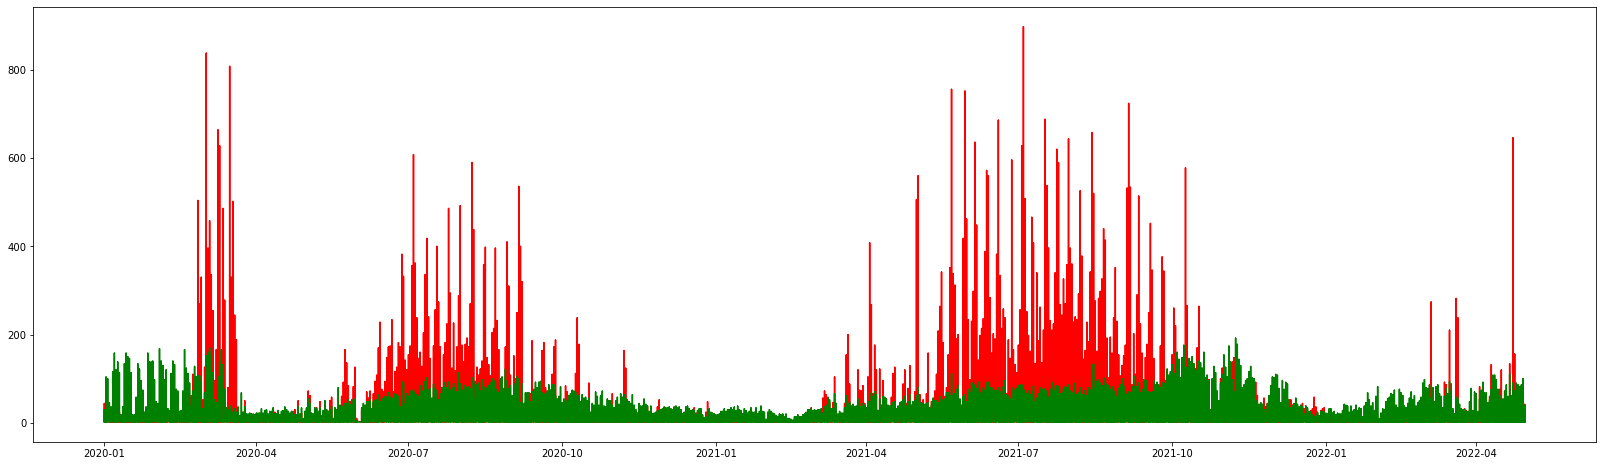

In [22]:
plt.figure(figsize=[28,8])
plt.plot(df_daily_casual["start_date"],df_daily_casual["daily_ride_type_count"], color='red')
plt.plot(df_daily_member["start_date"],df_daily_member["daily_ride_type_count"], color='green')
plt.show()

In [18]:
path = 'C:/Users/yc73905/Downloads/Bike_Sharing_Pjt/daily_causal.csv'
df_daily_casual.to_csv(path)

In [19]:
df_daily_member

,start_date,h3_index,lat,lng,geometry,member_casual,daily_ride_type_count
0,2020-01-01,872664c10ffffff,41.931865,-87.638686,POINT (-87.63868639644498 41.8661),member,4
1,2020-01-01,872664ca9ffffff,41.870611,-87.664571,POINT (-87.66457059524387 41.8856),member,4
3,2020-01-01,872664ca9ffffff,41.870611,-87.664571,POINT (-87.66457059524387 41.8834),member,2
4,2020-01-01,872664ca9ffffff,41.870611,-87.664571,POINT (-87.66457059524387 41.881),member,2
5,2020-01-01,872664ca9ffffff,41.870611,-87.664571,POINT (-87.66457059524387 41.8804),member,2
...,...,...,...,...,...,...,...
4148577,2022-04-30,872664c1affffff,41.874988,-87.635029,POINT (-87.63502864308958 41.86532116666667),member,2
4148579,2022-04-30,872664c1affffff,41.874988,-87.635029,POINT (-87.63502864308958 41.8653105),member,2
4148580,2022-04-30,872664c1affffff,41.874988,-87.635029,POINT (-87.63502864308958 41.870257),member,4
4148587,2022-04-30,872664c1affffff,41.874988,-87.635029,POINT (-87.63502864308958 41.864883),member,2


In [20]:
df_daily_member = df_daily_member.drop(['member_casual'], axis = 1)
df_daily_member

,start_date,h3_index,lat,lng,geometry,daily_ride_type_count
0,2020-01-01,872664c10ffffff,41.931865,-87.638686,POINT (-87.63868639644498 41.8661),4
1,2020-01-01,872664ca9ffffff,41.870611,-87.664571,POINT (-87.66457059524387 41.8856),4
3,2020-01-01,872664ca9ffffff,41.870611,-87.664571,POINT (-87.66457059524387 41.8834),2
4,2020-01-01,872664ca9ffffff,41.870611,-87.664571,POINT (-87.66457059524387 41.881),2
5,2020-01-01,872664ca9ffffff,41.870611,-87.664571,POINT (-87.66457059524387 41.8804),2
...,...,...,...,...,...,...
4148577,2022-04-30,872664c1affffff,41.874988,-87.635029,POINT (-87.63502864308958 41.86532116666667),2
4148579,2022-04-30,872664c1affffff,41.874988,-87.635029,POINT (-87.63502864308958 41.8653105),2
4148580,2022-04-30,872664c1affffff,41.874988,-87.635029,POINT (-87.63502864308958 41.870257),4
4148587,2022-04-30,872664c1affffff,41.874988,-87.635029,POINT (-87.63502864308958 41.864883),2


In [21]:
path = 'C:/Users/yc73905/Downloads/Bike_Sharing_Pjt/daily_member.csv'
df_daily_member.to_csv(path)

### 2.3 Hexagon sample daily time series & 7 and 30 days smoothing by membership - findings:
* The individual hexagon follows the overall time series pattern with trend and seasonlity (both weekly and monthly)
* It shows more stable demend for memberships than casual type, especially in winter to sprint time


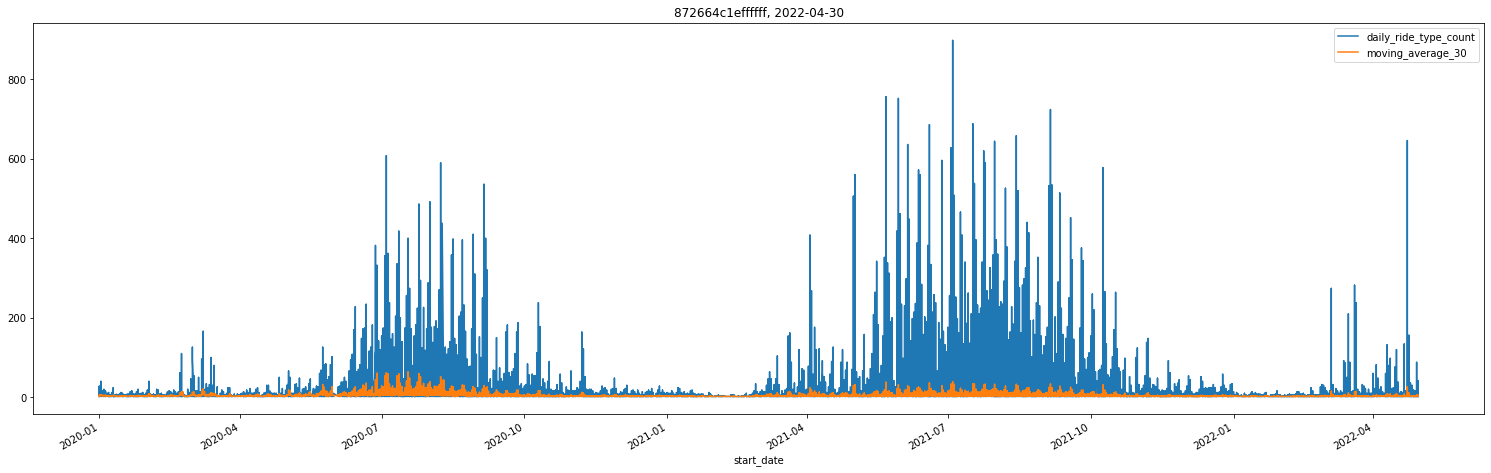

In [27]:
# Check moving average for an sample hexagon
hex_index_example = "872664c1effffff"
df = df_daily_casual
CurrentDate = max(df_daily_member['start_date']).strftime('%Y-%m-%d')
HexExample = df.loc[df['h3_index'] == hex_index_example]
PlotTitle = f"{hex_index_example}, {CurrentDate}"

df_hex = df.loc[df['h3_index'] == hex_index_example][['start_date','daily_ride_type_count']]
df_hex['moving_average_30'] = df_hex.daily_ride_type_count.rolling(30, min_periods=1).mean()
df_hex = df_hex.set_index('start_date')
df_hex
lines = df_hex.plot.line(figsize = (26, 8), title = PlotTitle)
plt.show()
                                                        

In [24]:
HexExample.head()

,start_date,h3_index,lat,lng,geometry,member_casual,daily_ride_type_count
160,2020-01-01,872664c1effffff,41.8954,-87.626394,POINT (-87.6263938841017 41.903),casual,2
163,2020-01-01,872664c1effffff,41.8954,-87.626394,POINT (-87.6263938841017 41.9023),casual,6
165,2020-01-01,872664c1effffff,41.8954,-87.626394,POINT (-87.6263938841017 41.9114),casual,2
167,2020-01-01,872664c1effffff,41.8954,-87.626394,POINT (-87.6263938841017 41.9117),casual,2
171,2020-01-01,872664c1effffff,41.8954,-87.626394,POINT (-87.6263938841017 41.9263),casual,4


(330797, 6)


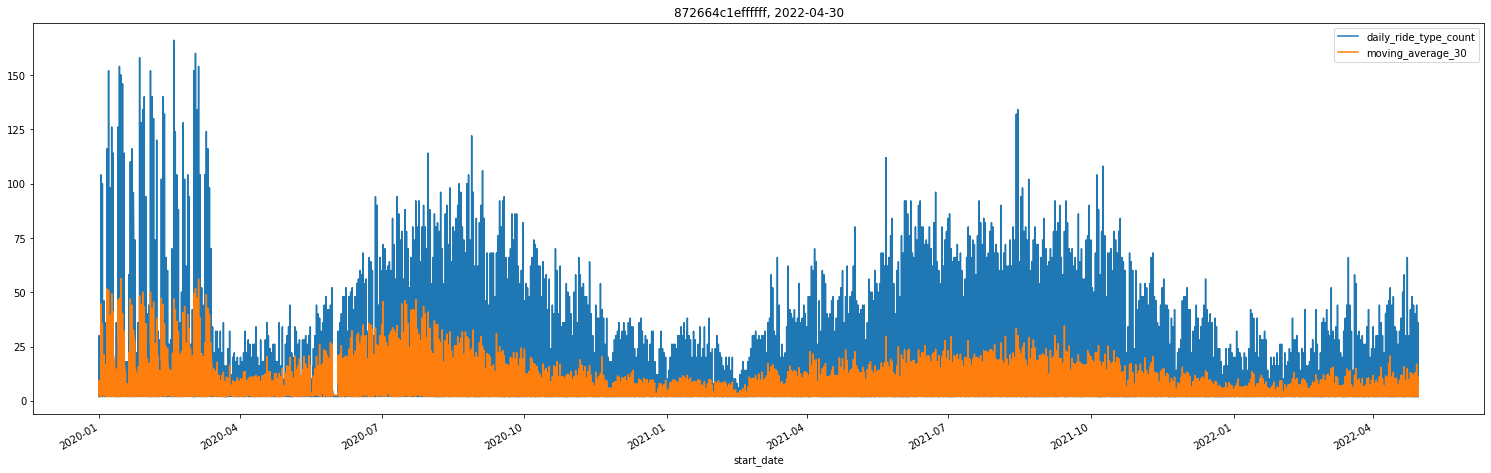

In [28]:
# Check moving average for an sample hexagon
hex_index_example = "872664c1effffff"
df = df_daily_member
CurrentDate = max(df_daily_casual['start_date']).strftime('%Y-%m-%d')
HexExample = df.loc[df['h3_index'] == hex_index_example]
print(HexExample.shape)
PlotTitle = f"{hex_index_example}, {CurrentDate}"

df_hex = df.loc[df['h3_index'] == hex_index_example][['start_date','daily_ride_type_count']]
df_hex['moving_average_30'] = df_hex.daily_ride_type_count.rolling(7, min_periods=1).mean()
df_hex = df_hex.set_index('start_date')
df_hex
lines = df_hex.plot.line(figsize = (26, 8), title = PlotTitle)
plt.show()
                

In [121]:
HexExample.head()

,start_date,h3_index,member_casual,daily_ride_type_count,DayOfWeek,year
46,2020-01-01,872664c1effffff,member,552,2,2020
142,2020-01-02,872664c1effffff,member,2270,3,2020
236,2020-01-03,872664c1effffff,member,2160,4,2020
329,2020-01-04,872664c1effffff,member,1076,5,2020
412,2020-01-05,872664c1effffff,member,836,6,2020


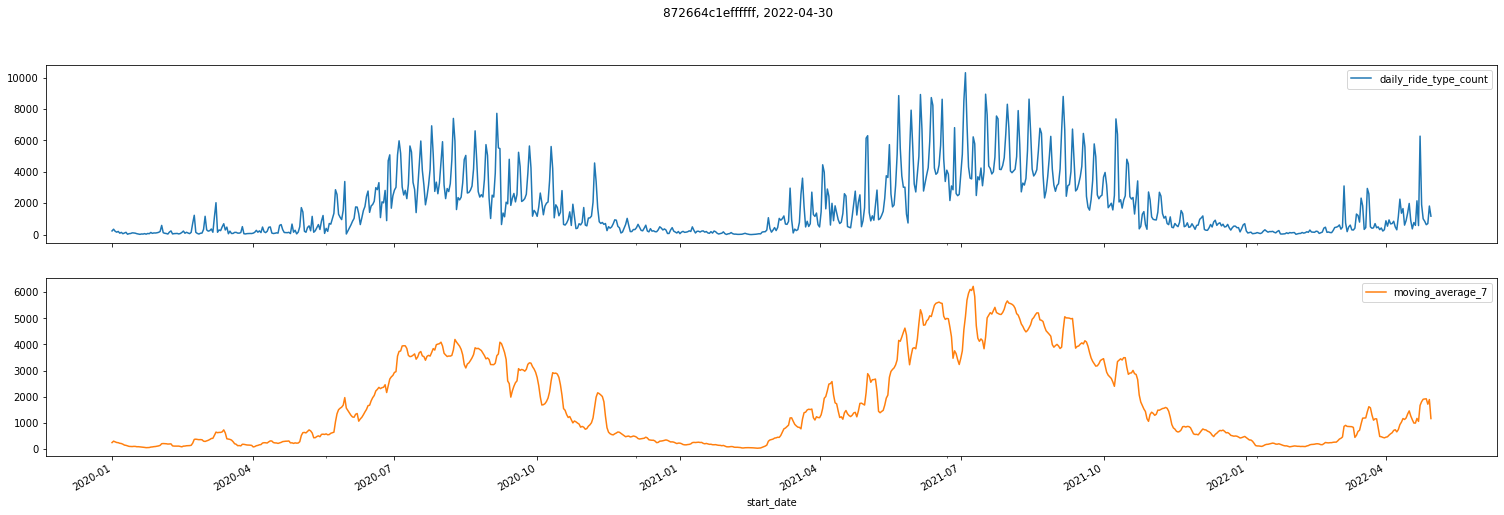

In [115]:
# Check moving average for an sample hexagon
hex_index_example = "872664c1effffff"
df = df_daily_casual
CurrentDate = max(df_daily_casual['start_date']).strftime('%Y-%m-%d')
HexExample = df.loc[df['h3_index'] == hex_index_example]
PlotTitle = f"{hex_index_example}, {CurrentDate}"

df_hex = df.loc[df['h3_index'] == hex_index_example][['start_date','daily_ride_type_count']]
df_hex['moving_average_7'] = df_hex.daily_ride_type_count.rolling(7, min_periods=1).mean()
df_hex = df_hex.set_index('start_date')
df_hex.plot(subplots = True, figsize = (26, 8), title = PlotTitle)
# plt.ledgent(loc='moving_average_7')
plt.show()
                                                        

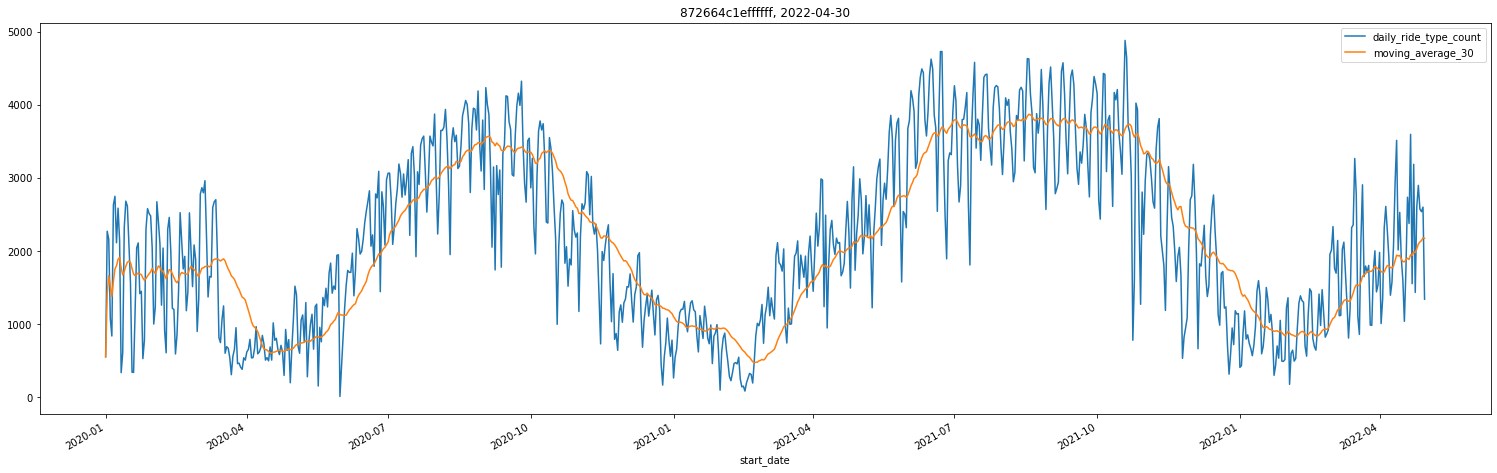

In [59]:
# Check moving average for an sample hexagon
hex_index_example = "872664c1effffff"
df = df_daily_member
CurrentDate = max(df_daily_member['start_date']).strftime('%Y-%m-%d')
HexExample = df.loc[df['h3_index'] == hex_index_example]
PlotTitle = f"{hex_index_example}, {CurrentDate}"

df_hex = df.loc[df['h3_index'] == hex_index_example][['start_date','daily_ride_type_count']]
df_hex['moving_average_30'] = df_hex.daily_ride_type_count.rolling(30, min_periods=1).mean()
df_hex = df_hex.set_index('start_date')
df_hex
lines = df_hex.plot.line(figsize = (26, 8), title = PlotTitle)
plt.show()

### 2.4 Weekly time series data - findings:
* Overall it has higher demand during week days, espcially on Tuesdays, Wednesdays, and Fridays.
* Weekly demand is much higer in 2021 than 2020
* the member and casual bike sharing demand in a week is trending in an opposite way. For memember bike sharing, the demand is mostly during the week days, the demand for casual bike sharing is mostly during the weekend and the peek is Fridays.

In [29]:
df1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,year,dayofweek,dayofmonth,duration_minutes,h3_index,lat,lng,geometry,start_date
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,41.894434,-87.623379,casual,11,2020,6,1,9.666667,872664c1effffff,41.895400,-87.626394,POINT (-87.6263938841017 41.8941765),2020-11-01
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,41.900675,-87.662480,casual,11,2020,6,1,11.316667,872664cadffffff,41.891024,-87.655950,POINT (-87.65595033896504 41.89095866666667),2020-11-01
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,41.872054,-87.629550,casual,11,2020,6,1,29.016667,872664c1affffff,41.874988,-87.635029,POINT (-87.63502864308958 41.88098283333333),2020-11-01
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,41.917744,-87.691392,casual,11,2020,6,1,9.250000,872664ca1ffffff,41.923092,-87.697834,POINT (-87.69783408505538 41.89549916666667),2020-11-01
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,41.876448,-87.620338,casual,11,2020,6,1,33.450000,872664c1affffff,41.874988,-87.635029,POINT (-87.63502864308958 41.87649733333333),2020-11-01


In [30]:
df1['year_week'] = df1[['year', 'dayofweek']].apply(lambda x: '{}w{}'.format(x[0],x[1]), axis=1)
df1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,year,dayofweek,dayofmonth,duration_minutes,h3_index,lat,lng,geometry,start_date,year_week
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,41.894434,-87.623379,casual,11,2020,6,1,9.666667,872664c1effffff,41.895400,-87.626394,POINT (-87.6263938841017 41.8941765),2020-11-01,2020w6
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,41.900675,-87.662480,casual,11,2020,6,1,11.316667,872664cadffffff,41.891024,-87.655950,POINT (-87.65595033896504 41.89095866666667),2020-11-01,2020w6
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,41.872054,-87.629550,casual,11,2020,6,1,29.016667,872664c1affffff,41.874988,-87.635029,POINT (-87.63502864308958 41.88098283333333),2020-11-01,2020w6
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,41.917744,-87.691392,casual,11,2020,6,1,9.250000,872664ca1ffffff,41.923092,-87.697834,POINT (-87.69783408505538 41.89549916666667),2020-11-01,2020w6
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,41.876448,-87.620338,casual,11,2020,6,1,33.450000,872664c1affffff,41.874988,-87.635029,POINT (-87.63502864308958 41.87649733333333),2020-11-01,2020w6


In [31]:
df2 = df1[['year','dayofweek', 'year_week','member_casual', 'h3_index']].sort_values(['year', 'dayofweek'])
df2

,year,dayofweek,year_week,member_casual,h3_index
63,2020,0,2020w0,casual,872664c12ffffff
64,2020,0,2020w0,casual,872664c1effffff
67,2020,0,2020w0,casual,872664c10ffffff
68,2020,0,2020w0,casual,872664ca9ffffff
69,2020,0,2020w0,casual,872664cf4ffffff
...,...,...,...,...,...
16145723,2022,6,2022w6,casual,872664cb1ffffff
16145724,2022,6,2022w6,casual,872664cb1ffffff
16145728,2022,6,2022w6,casual,872664c1effffff
16145732,2022,6,2022w6,casual,872664c16ffffff


In [32]:
# count points by each day for 2020, 2021, 2022 for member_casual
df_weekly = df2.groupby(['year_week', 'member_casual'])[['h3_index']].count().reset_index()
df_weekly_20_21 = df_weekly.iloc[:-15]
df_weekly_20_21['weekly_average'] = df_weekly['h3_index']/52
df_weekly_20_21

__main__:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,year_week,member_casual,h3_index,weekly_average
0,2020w0,casual,268616,5165.692308
1,2020w0,member,561470,10797.500000
2,2020w1,casual,260476,5009.153846
3,2020w1,member,607314,11679.115385
4,2020w2,casual,288596,5549.923077
5,2020w2,member,634460,12201.153846
6,2020w3,casual,307586,5915.115385
7,2020w3,member,631296,12140.307692
8,2020w4,casual,383819,7381.134615
9,2020w4,member,626000,12038.461538


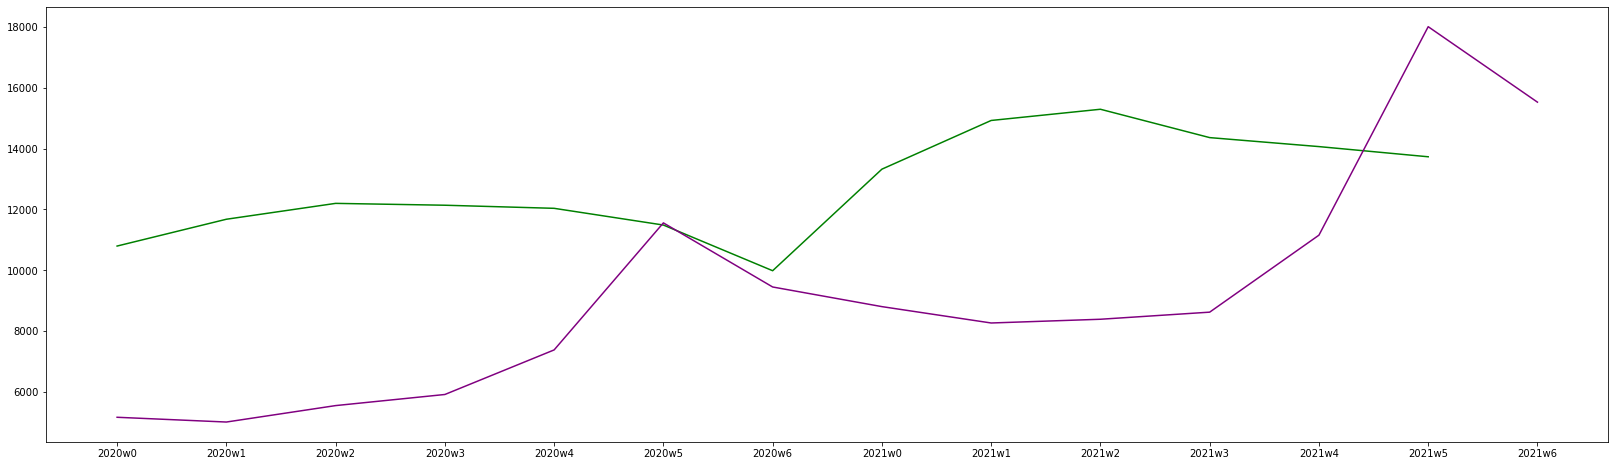

In [33]:
df_weekly_casual = df_weekly_20_21[df_weekly_20_21['member_casual']=='casual']
df_weekly_member = df_weekly_20_21[df_weekly_20_21['member_casual']=='member']

plt.figure(figsize=[28,8])
plt.plot(df_weekly_member["year_week"],df_weekly_member["weekly_average"], color='green')
plt.plot(df_weekly_casual["year_week"],df_weekly_casual["weekly_average"], color='purple')
plt.show()

## 3. Convert CSV with Lat & long to GeoDatabase

In [46]:
df_4 = pd.read_csv("C:/Users/yc73905/Downloads/Bike_Sharing_Pjt/daily_member.csv")
df_4

,Unnamed: 0,start_date,h3_index,lat,lng,geometry,daily_ride_type_count
0,0,2020-01-01,872664c10ffffff,41.931865,-87.638686,POINT (-87.63868639644498 41.8661),4
1,1,2020-01-01,872664ca9ffffff,41.870611,-87.664571,POINT (-87.66457059524387 41.8856),4
2,3,2020-01-01,872664ca9ffffff,41.870611,-87.664571,POINT (-87.66457059524387 41.8834),2
3,4,2020-01-01,872664ca9ffffff,41.870611,-87.664571,POINT (-87.66457059524387 41.881),2
4,5,2020-01-01,872664ca9ffffff,41.870611,-87.664571,POINT (-87.66457059524387 41.8804),2
...,...,...,...,...,...,...,...
2455508,4148577,2022-04-30,872664c1affffff,41.874988,-87.635029,POINT (-87.63502864308958 41.86532116666667),2
2455509,4148579,2022-04-30,872664c1affffff,41.874988,-87.635029,POINT (-87.63502864308958 41.8653105),2
2455510,4148580,2022-04-30,872664c1affffff,41.874988,-87.635029,POINT (-87.63502864308958 41.870257),4
2455511,4148587,2022-04-30,872664c1affffff,41.874988,-87.635029,POINT (-87.63502864308958 41.864883),2


In [61]:
# import arcpy
# arcpy.env.workspace = "C:/Users/yc73905/Downloads/Bike_Sharing_Pjt"
# arcpy.TableToTable_conversion("C:/Users/yc73905/Downloads/Bike_Sharing_Pjt/daily_member.csv", "C:/Users/yc73905/Downloads/Bike_Sharing_Pjt/output.gdb", "daily_member")

<Result 'C:/Users/yc73905/Downloads/Bike_Sharing_Pjt/output.gdb\\daily_member'>

In [5]:
#  Convert CSV file and save it to geo-database
XFieldName = 'lng'
YFieldName = 'lat'
outFolder = "C:/Users/yc73905/Downloads/Bike_Sharing_Pjt/output.gdb"
spatialRef = arcpy.SpatialReference(4326)
csvFilePath = "C:/Users/yc73905/Downloads/Bike_Sharing_Pjt/daily_member.csv"

arcpy.MakeXYEventLayer_management(csvFilePath, XFieldName, YFieldName, "daily_member_shp", spatial_reference=spatialRef)
arcpy.FeatureClassToShapefile_conversion("daily_member_shp", outFolder)

<Result 'C:\\Users\\yc73905\\Downloads\\Bike_Sharing_Pjt\\output'>

In [4]:
df_5 = pd.read_csv("C:/Users/yc73905/Downloads/Bike_Sharing_Pjt/gdf_start_7_.csv")
df_5.head(5)

sys:1: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,year,dayofweek,dayofmonth,duration_minutes,h3_index,lat,lng,geometry
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,41.894434,-87.623379,casual,11,2020,6,1,9.666667,872664c1effffff,41.895400,-87.626394,POINT (-87.6263938841017 41.8941765)
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,41.900675,-87.662480,casual,11,2020,6,1,11.316667,872664cadffffff,41.891024,-87.655950,POINT (-87.65595033896504 41.89095866666667)
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,41.872054,-87.629550,casual,11,2020,6,1,29.016667,872664c1affffff,41.874988,-87.635029,POINT (-87.63502864308958 41.88098283333333)
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,41.917744,-87.691392,casual,11,2020,6,1,9.250000,872664ca1ffffff,41.923092,-87.697834,POINT (-87.69783408505538 41.89549916666667)
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,41.876448,-87.620338,casual,11,2020,6,1,33.450000,872664c1affffff,41.874988,-87.635029,POINT (-87.63502864308958 41.87649733333333)


In [5]:
#  Convert CSV file and save it to geo-database
XFieldName = 'lng'
YFieldName = 'lat'
outFolder = "C:/Users/yc73905/Downloads/Bike_Sharing_Pjt/output.gdb"
spatialRef = arcpy.SpatialReference(4326)
csvFilePath = "C:/Users/yc73905/Downloads/Bike_Sharing_Pjt/gdf_start_7_.csv"

arcpy.MakeXYEventLayer_management(csvFilePath, XFieldName, YFieldName, "gdp_7_shp", spatial_reference=spatialRef)
arcpy.FeatureClassToShapefile_conversion("gdp_7_shp", outFolder)

<Result 'C:\\Users\\yc73905\\Downloads\\Bike_Sharing_Pjt\\output'>

In [1]:
# Check table type and rows
def check_files(input_path):
    arcpy.env.workspace = input_path

    # Check feature class in this gdb and what shape type of the file
    featureclasses = arcpy.ListFeatureClasses()

    for fc in featureclasses:
        desc = arcpy.Describe(fc)
        print(fc)
        print(fc + ' is a ' + desc.shapeType, 'feature class')
    
    for fc in featureclasses:
        count = arcpy.GetCount_management(fc)
        print(count)

input_path = "C:/Users/yc73905/Downloads/Bike_Sharing_Pjt/output.gdb"
check_files(input_path)


daily_member_shp
daily_member_shp is a Point feature class
gdp_7_shp
gdp_7_shp is a Point feature class
2455513
17271164


In [8]:
def printNumericalFieldNames(inputFc, workspace):
    import arcpy
    arcpy.env.workspace = workspace
    fc = inputFc
    fieldsList = arcpy.ListFields(fc)
    for field in fieldsList:
        if field.type in ['Double','Integer', 'SmallInteger']:
            print("{0} is a type of {1} with a length of {2}"
              .format(field.name, field.type, field.length))

inputFc = "gdp_7_shp"
workspace = "C:/Users/yc73905/Downloads/Bike_Sharing_Pjt/output.gdb"
printNumericalFieldNames(inputFc=inputFc, workspace=workspace)
    

start_lat is a type of Double with a length of 8
start_lng is a type of Double with a length of 8
end_lat is a type of Double with a length of 8
end_lng is a type of Double with a length of 8
month is a type of Integer with a length of 4
year is a type of Integer with a length of 4
dayofweek is a type of Integer with a length of 4
dayofmonth is a type of Integer with a length of 4
duration_minutes is a type of Double with a length of 8
lat is a type of Double with a length of 8
lng is a type of Double with a length of 8


In [8]:
# # checking each row in the file including headers and row values
# def show_rows(file_nm):
#     fc =  file_nm
#     with arcpy.da.SearchCursor(fc, "*") as cursor:
#         print(cursor.fields) # print headers
#         for row in cursor:
#             print(row[0])

# #Test
# file_nm = "gdp_7_shp"
# show_rows(file_nm)

In [16]:
def printNumericalFieldNames(inputFc, workspace):
    import arcpy
    arcpy.env.workspace = workspace
    fc = inputFc
    fieldsList = arcpy.ListFields(fc)
    for field in fieldsList:
        if field.type in ['Double','Integer', 'SmallInteger']:
            print("{0} is a type of {1} with a length of {2}"
              .format(field.name, field.type, field.length))

inputFc = "daily_member_shp"
workspace = "C:/Users/yc73905/Downloads/Bike_Sharing_Pjt/output.gdb"
printNumericalFieldNames(inputFc=inputFc, workspace=workspace)
    

Field1 is a type of Integer with a length of 4
lat is a type of Double with a length of 8
lng is a type of Double with a length of 8
daily_ride_type_count is a type of Integer with a length of 4
